In [1]:
# Simple Tutorial on Kernels and KDE (Kernel Density Estimation) : 
    # https://chemicalstatistician.wordpress.com/2013/06/09/exploratory-data-analysis-kernel-density-estimation-in-r-on-ozone-pollution-data-in-new-york-and-ozonopolis/

In [1]:
import scipy.io
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

train_mat = scipy.io.loadmat('mnist_train.mat')
train_data = train_mat['images']
train_labels = train_mat['labels']
 
test_mat = scipy.io.loadmat('mnist_test.mat')
test_data = test_mat['t10k_images']
test_labels = test_mat['t10k_labels']

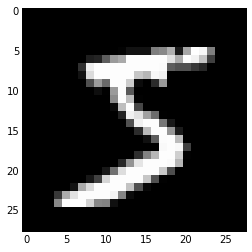

In [2]:
%matplotlib inline
images = pd.DataFrame(train_data)
X = images[0]
plt.imshow(images[0].reshape(28,28).T, interpolation='nearest',cmap='gray')

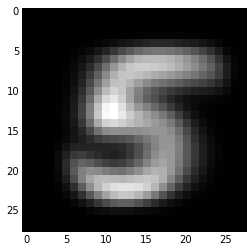

In [3]:
data = train_data
labels = train_labels
data5 = data[:, (labels == 5).ravel()]
meanImage5Vect = np.mean(data5, axis = 1)
meanImage5Vect
plt.imshow(meanImage5Vect.reshape(28,28).T, interpolation='nearest',cmap='gray')

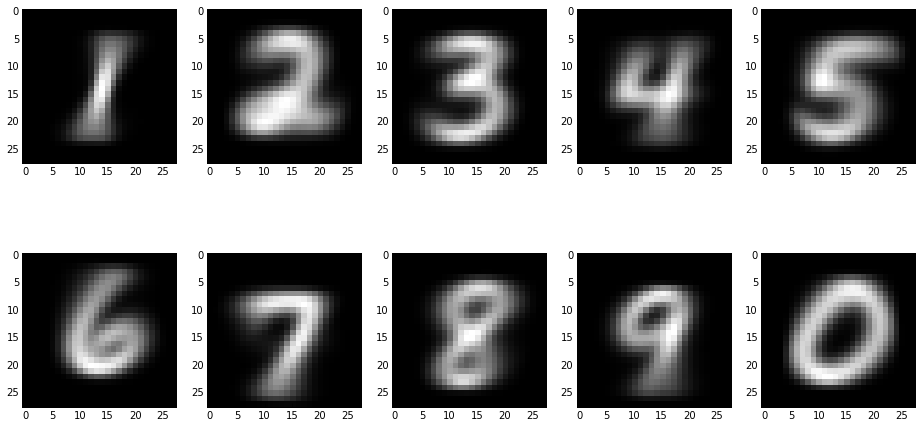

In [86]:
listOfMeans = []

for i in range(0,10,1):
    nextFilteredData = data[:, (labels == i).ravel()]
    meanImage = np.mean(nextFilteredData, axis = 1) # Mean across columns = axis 0 # Mean across rows is axis 1
    listOfMeans.append(meanImage)

plt.figure(1)   # the first figure
# Get current size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16 # Set Width
fig_size[1] = 8 # Set Height
plt.rcParams["figure.figsize"] = fig_size

plt.subplot(250)             
plt.imshow(listOfMeans[0].reshape(28,28).T, interpolation='nearest',cmap='gray')
plt.subplot(251)            
plt.imshow(listOfMeans[1].reshape(28,28).T, interpolation='nearest',cmap='gray')
plt.subplot(252)             
plt.imshow(listOfMeans[2].reshape(28,28).T, interpolation='nearest',cmap='gray')
plt.subplot(253)            
plt.imshow(listOfMeans[3].reshape(28,28).T, interpolation='nearest',cmap='gray')
plt.subplot(254)            
plt.imshow(listOfMeans[4].reshape(28,28).T, interpolation='nearest',cmap='gray')
plt.subplot(255)            
plt.imshow(listOfMeans[5].reshape(28,28).T, interpolation='nearest',cmap='gray')
plt.subplot(256)            
plt.imshow(listOfMeans[6].reshape(28,28).T, interpolation='nearest',cmap='gray')
plt.subplot(257)             
plt.imshow(listOfMeans[7].reshape(28,28).T, interpolation='nearest',cmap='gray')
plt.subplot(258)           
plt.imshow(listOfMeans[8].reshape(28,28).T, interpolation='nearest',cmap='gray')
plt.subplot(259)            
plt.imshow(listOfMeans[9].reshape(28,28).T, interpolation='nearest',cmap='gray')

plt.show()

In [5]:
def displayImage(imageDisplay):
    plt.imshow(imageDisplay.reshape(28,28).T, interpolation='nearest',cmap='gray')

classification:  1 [1]


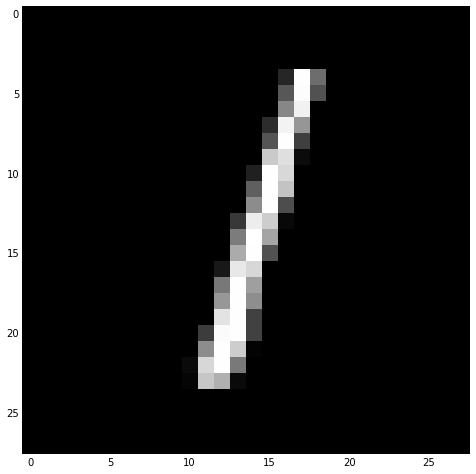

In [6]:
# Classify Test Set
    # http://stackoverflow.com/questions/4455076/numpy-access-an-array-by-column

def simpleClassify(testX):
    differences = np.zeros(10)
    for meanImageIndex in range(0, len(listOfMeans), 1):
        imageDiff = np.mean(pow(((testX + listOfMeans[meanImageIndex])/2) - listOfMeans[meanImageIndex] , 2))
        differences[meanImageIndex] = imageDiff
    return np.argmin(differences)
        
#Simple Test
print 'classification: ', simpleClassify(test_data[:,2]), test_labels[2] 
displayImage(test_data[:,2])

In [90]:
predictions = []

for i in range (0,len(test_labels),1):
    X = test_data[:,i]
    predictions.append(simpleClassify(X))

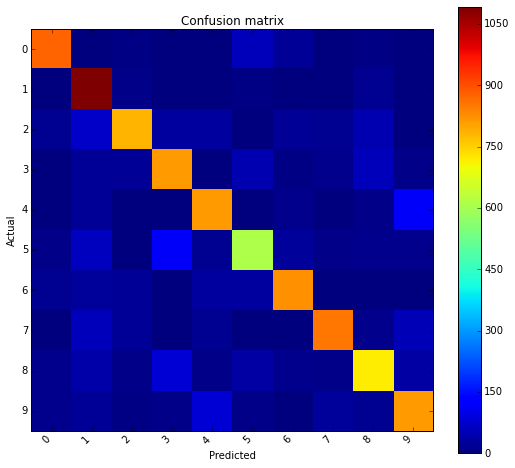

In [75]:
#Simple Classification Algorithm Using the Image Means 
    #Confusion Matrix:  
        # http://stackoverflow.com/questions/2148543/how-to-write-a-confusion-matrix-in-python

import pandas as pd
y_actu = test_labels.ravel()
y_pred = np.array(predictions)

df_confusion = ConfusionMatrix(y_actu, y_pred)
df_confusion.plot(cmap=plt.cm.jet)

In [76]:
from pandas_confusion import ConfusionMatrix
print df_confusion.print_stats()

Confusion Matrix:

Predicted    0     1    2     3     4    5    6    7    8     9  __all__
Actual                                                                  
0          878     0    7     2     2   58   25    1    7     0      980
1            0  1092   10     3     0    7    3    0   20     0     1135
2           19    71  781    33    31    3   23   18   50     3     1032
3            4    24   25   814     1   49    8   15   58    12     1010
4            1    22    2     0   811    3   16    1   10   116      982
5           11    63    2   118    21  612   27   10   13    15      892
6           18    27   22     0    31   32  827    0    1     0      958
7            2    59   22     1    20    2    0  856   13    53     1028
8           14    39   11    83    12   36   13   10  718    38      974
9           15    22    7    10    83   12    1   27   18   814     1009
__all__    962  1419  889  1064  1012  814  943  938  908  1051    10000


Overall Statistics:

Accuracy:

In [80]:
predictions2 = []

pointsToTest = 1000 # 1000
count = 0

for i in range (0,pointsToTest,1):
    X = test_data[:,i]
    scores = np.zeros(10)
    for j in range(0, 10, 1): 
        trainingMatrix = train_data[:,(train_labels == j).ravel()]
        diff =  np.mean(np.exp((-1/2 * np.sum((((X.reshape(784,1) - trainingMatrix ) * (X.reshape(784,1) - trainingMatrix))), axis = 0).ravel())))     
        scores[j] = np.sum(diff)
    predictions2.append(np.argmax(scores))
    count = count + 1
    print count, '[', np.argmax(scores), ']'

print 'done'

1 [ 7 ]
2 [ 2 ]
3 [ 1 ]
4 [ 0 ]
5 [ 4 ]
6 [ 1 ]
7 [ 4 ]
8 [ 9 ]
9 [ 5 ]
10 [ 9 ]
11 [ 0 ]
12 [ 6 ]
13 [ 9 ]
14 [ 0 ]
15 [ 1 ]
16 [ 5 ]
17 [ 9 ]
18 [ 7 ]
19 [ 3 ]
20 [ 4 ]
21 [ 9 ]
22 [ 6 ]
23 [ 6 ]
24 [ 5 ]
25 [ 4 ]
26 [ 0 ]
27 [ 7 ]
28 [ 4 ]
29 [ 0 ]
30 [ 1 ]
31 [ 3 ]
32 [ 1 ]
33 [ 3 ]
34 [ 4 ]
35 [ 7 ]
36 [ 2 ]
37 [ 7 ]
38 [ 1 ]
39 [ 2 ]
40 [ 1 ]
41 [ 1 ]
42 [ 7 ]
43 [ 4 ]
44 [ 2 ]
45 [ 3 ]
46 [ 5 ]
47 [ 1 ]
48 [ 2 ]
49 [ 4 ]
50 [ 4 ]
51 [ 6 ]
52 [ 3 ]
53 [ 5 ]
54 [ 5 ]
55 [ 6 ]
56 [ 0 ]
57 [ 4 ]
58 [ 1 ]
59 [ 9 ]
60 [ 5 ]
61 [ 7 ]
62 [ 8 ]
63 [ 9 ]
64 [ 3 ]
65 [ 7 ]
66 [ 4 ]
67 [ 6 ]
68 [ 4 ]
69 [ 3 ]
70 [ 0 ]
71 [ 7 ]
72 [ 0 ]
73 [ 2 ]
74 [ 9 ]
75 [ 1 ]
76 [ 7 ]
77 [ 3 ]
78 [ 2 ]
79 [ 9 ]
80 [ 7 ]
81 [ 7 ]
82 [ 6 ]
83 [ 2 ]
84 [ 7 ]
85 [ 8 ]
86 [ 4 ]
87 [ 7 ]
88 [ 3 ]
89 [ 6 ]
90 [ 1 ]
91 [ 3 ]
92 [ 6 ]
93 [ 9 ]
94 [ 3 ]
95 [ 1 ]
96 [ 4 ]
97 [ 1 ]
98 [ 7 ]
99 [ 6 ]
100 [ 9 ]
101 [ 6 ]
102 [ 0 ]
103 [ 5 ]
104 [ 4 ]
105 [ 9 ]
106 [ 9 ]
107 [ 2 ]
108 [ 1 ]
109 [ 9 ]
110 [ 4 ]
111 [ 8 

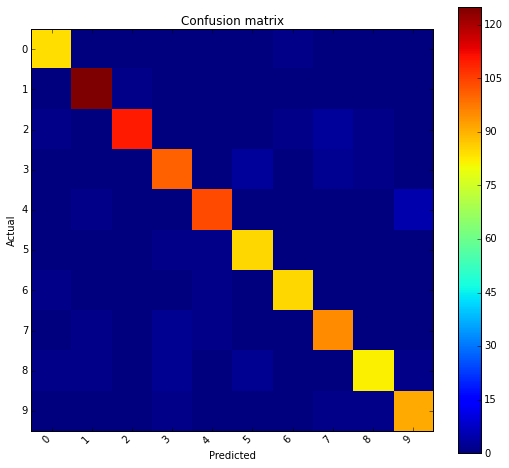

In [84]:
y_actu = test_labels.ravel()[:1000]
y_pred = np.array(predictions2)

df_confusion = ConfusionMatrix(y_actu, y_pred)
df_confusion.plot(cmap=plt.cm.jet)

In [85]:
print df_confusion.print_stats()

Confusion Matrix:

Predicted   0    1    2    3    4   5   6    7   8   9  __all__
Actual                                                         
0          84    0    0    0    0   0   1    0   0   0       85
1           0  125    1    0    0   0   0    0   0   0      126
2           1    0  110    0    0   0   1    3   1   0      116
3           0    0    0  101    0   3   0    2   1   0      107
4           0    1    0    0  104   0   0    0   0   5      110
5           0    0    0    1    1  85   0    0   0   0       87
6           1    0    0    0    1   0  85    0   0   0       87
7           0    1    0    2    1   0   0   95   0   0       99
8           1    1    0    2    0   2   0    0  82   1       89
9           0    0    0    1    0   0   0    1   1  91       94
__all__    87  128  111  107  107  90  87  101  85  97     1000


Overall Statistics:

Accuracy: 0.962
95% CI: (0.94821289637803619, 0.97297118401701799)
No Information Rate: ToDo
P-Value [Acc > NIR]: 0.0
Kappa: 0

In [88]:
#ANOMOLY DETECTION


predictions2 = []
maxDiffs = []

pointsToTest = 1000
count = 0

for i in range (0,pointsToTest,1):
    X = test_data[:,i]
    scores = np.zeros(10)
    for j in range(0, 10, 1): 
        trainingMatrix = train_data[:,(train_labels == j).ravel()]
        diff =  np.mean(np.exp((-1/2 * np.sum((((X.reshape(784,1) - trainingMatrix ) * (X.reshape(784,1) - trainingMatrix))), axis = 0).ravel())))     
        scores[j] = np.sum(diff)
    predictions2.append(scores)
    maxDiffs.append(np.mean(scores))
    print count,'[',np.mean(scores), ']'  
    count = count + 1

0 [ 1.55931843008e-08 ]
1 [ 1.84871579935e-14 ]
2 [ 3.3640241847e-05 ]
3 [ 5.32373083934e-15 ]
4 [ 3.78567515656e-13 ]
5 [ 3.19363171542e-05 ]
6 [ 8.81546030898e-17 ]
7 [ 1.33588267155e-16 ]
8 [ 2.63302159054e-25 ]
9 [ 4.59599853279e-12 ]
10 [ 3.84827962904e-13 ]
11 [ 1.79478926152e-19 ]
12 [ 7.1684802675e-10 ]
13 [ 1.55379548643e-10 ]
14 [ 4.84929580364e-07 ]
15 [ 8.34180881093e-19 ]
16 [ 1.11035323005e-10 ]
17 [ 1.15569156987e-09 ]
18 [ 4.22637730454e-23 ]
19 [ 1.43087974889e-10 ]
20 [ 2.94744393524e-11 ]
21 [ 2.22641840113e-11 ]
22 [ 2.87187519869e-15 ]
23 [ 5.40730042887e-15 ]
24 [ 1.85524573224e-13 ]
25 [ 2.42555052578e-18 ]
26 [ 3.55032701954e-12 ]
27 [ 2.21056441969e-12 ]
28 [ 3.99552074821e-14 ]
29 [ 1.61543954383e-06 ]
30 [ 3.49977016542e-15 ]
31 [ 4.67203561748e-06 ]
32 [ 7.75980357386e-10 ]
33 [ 2.72005716479e-18 ]
34 [ 8.19672642244e-10 ]
35 [ 7.79911155668e-21 ]
36 [ 2.49761262788e-15 ]
37 [ 2.07609911103e-05 ]
38 [ 2.21826647424e-16 ]
39 [ 1.11473349677e-06 ]
40 [ 3.83291

anomoly index:  151


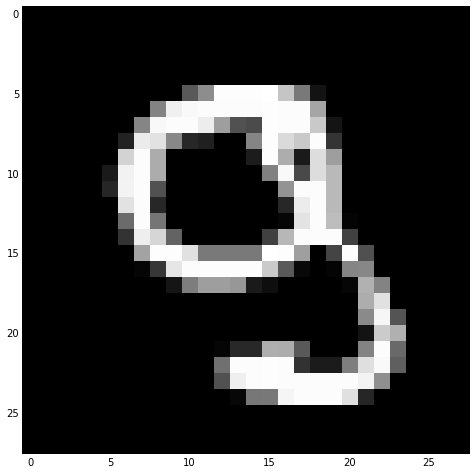

In [89]:
print 'anomoly index: ', np.argmin(maxDiffs)
displayImage(test_data[:,np.argmin(maxDiffs)])